<a href="https://colab.research.google.com/github/ferjozsot23/machine-learning/blob/main/K_Nearest_Neighbors.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Fernando José Soto Jácome

# Objetivos
1. Utilizar Naïve Bayes como modelo de aprendizaje automático para resolver tareas de clasificación
1. Utilizar K-Nearest Neighbors como modelo de clasificación
1. Analizar el valor de precisión de cada técnica de clasificación

# Introducción
Clasificar una observación se puede lograr analizando sus características propias o también comparándola con otras observaciones similares. Estas son una de las maneras en cómo se puede predecir la pertenencia de una observación a una clase. Afortunadamente, existen métodos y técnicas que nos permite realizar estas predicciones.
Por un lado se tiene a Naive Bayes, que analiza las características de una observación y las evalúa independientemente, es decir, que cada feature no influye en el resultado de otro. Por otra parte, la técnica KNN permite fijarse en los vecinos más cercanos de la observación y clasificarlo de manera precisa.

En esta práctica se realizará los dos procesos haciendo uso de dos datasets diferentes, los cuales disponen de variables taget con dos o más categorías. Se analizará el proceso para la predicción y los resultados de precisión en cada uno de ellos.

# Ejercicios presentados

# Diferencia entre usar un modelo MultinomialNB() y GaussianNB()

Cada algoritmo de Naïve Bayes (NB) espera diferentes tipos de datos.

1. GaussianNB: cuando tiene funciones continuas.
1. CategoricalNB: cuando tiene datos categóricos
1. MultinomialNB: cuando se aplica a datos de texto.

Cuando un dataset contiene características continuas, características categóricas y datos de texto, se debe ajustar las características categóricas en CategoricalNB, las características continuas en GaussianNB y los datos de texto en MultinomialNB.

# Ejercicios Python

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, multilabel_confusion_matrix,accuracy_score
from sklearn import preprocessing
from sklearn.neighbors import NearestNeighbors, KNeighborsClassifier

from utilities import visualize_classifier
from pathlib import Path

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from metric import classificationSummary

# Naïve Bayes

## Gaussian Naïve Bayes Algorithm

In [ ]:
#Se carga el dataset obtenido de https://www.kaggle.com/datasets/sjleshrac/airlines-customer-satisfaction
fly_df = pd.read_csv('Invistico_Airline.csv')
fly_df.head()

,satisfaction,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,satisfied,Female,Loyal Customer,65,Personal Travel,Eco,265,0,0,0,...,2,3,3,0,3,5,3,2,0,0.0
1,satisfied,Male,Loyal Customer,47,Personal Travel,Business,2464,0,0,0,...,2,3,4,4,4,2,3,2,310,305.0
2,satisfied,Female,Loyal Customer,15,Personal Travel,Eco,2138,0,0,0,...,2,2,3,3,4,4,4,2,0,0.0
3,satisfied,Female,Loyal Customer,60,Personal Travel,Eco,623,0,0,0,...,3,1,1,0,1,4,1,3,0,0.0
4,satisfied,Female,Loyal Customer,70,Personal Travel,Eco,354,0,0,0,...,4,2,2,0,2,4,2,5,0,0.0


In [ ]:
fly_df.dtypes

satisfaction                          object
Gender                                object
Customer Type                         object
Age                                    int64
Type of Travel                        object
Class                                 object
Flight Distance                        int64
Seat comfort                           int64
Departure/Arrival time convenient      int64
Food and drink                         int64
Gate location                          int64
Inflight wifi service                  int64
Inflight entertainment                 int64
Online support                         int64
Ease of Online booking                 int64
On-board service                       int64
Leg room service                       int64
Baggage handling                       int64
Checkin service                        int64
Cleanliness                            int64
Online boarding                        int64
Departure Delay in Minutes             int64
Arrival De

### Future Selection: variables relevantes

In [ ]:
fly_df.drop(columns=['Type of Travel','Class', 'Customer Type', 'Gender', 'Arrival Delay in Minutes'], inplace=True)

In [ ]:
fly_df.head()

,satisfaction,Age,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes
0,satisfied,65,265,0,0,0,2,2,4,2,3,3,0,3,5,3,2,0
1,satisfied,47,2464,0,0,0,3,0,2,2,3,4,4,4,2,3,2,310
2,satisfied,15,2138,0,0,0,3,2,0,2,2,3,3,4,4,4,2,0
3,satisfied,60,623,0,0,0,3,3,4,3,1,1,0,1,4,1,3,0
4,satisfied,70,354,0,0,0,3,4,3,4,2,2,0,2,4,2,5,0


In [ ]:
# Variables predictoras y variable target
y = fly_df['satisfaction']
X = fly_df.drop(columns=['satisfaction'])

In [ ]:
classifier = GaussianNB()

In [ ]:
# Entrenar a classifier
classifier.fit(X, y)

GaussianNB()

In [ ]:
y_pred = classifier.predict(X)

In [ ]:
accuracy = 100.0 * (y == y_pred).sum() / X.shape[0]
print("Accuracy of Naïve Bayes classifier =", round(accuracy, 2), "%")

Accuracy of Naïve Bayes classifier = 79.23 %


#### Dado que no se hizo split data, el accuracy de Naive Bayes Classifier es bajo, por tanto se realizará la validación cruzada. Dividir los datos en subconjuntos de entrenamiento y prueba

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=3)

classifier_new = GaussianNB()
classifier_new.fit(X_train, y_train)

y_test_pred = classifier_new.predict(X_test)

In [ ]:
# compute accuracy of the classifier
accuracy = 100.0 * (y_test == y_test_pred).sum() / X_test.shape[0]
print("Accuracy of the new classifier =", round(accuracy, 2), "%")


Accuracy of the new classifier = 79.3 %


#### El accuracy incrementó después de split data

In [ ]:
confusion_matrix(y_test, y_test_pred)

array([[ 8909,  2900],
       [ 2477, 11690]], dtype=int64)

In [ ]:
# Clase 0
MCM_0 = multilabel_confusion_matrix(y_test, y_test_pred, labels=[0])
tn, fp, fn, tp = MCM_0.ravel()
print(tn, fp, fn, tp)

25976 0 0 0


In [ ]:
# Clase 1
MCM_1 = multilabel_confusion_matrix(y_test, y_test_pred, labels=[1])
tn, fp, fn, tp = MCM_1.ravel()
print(tn, fp, fn, tp)

25976 0 0 0


In [ ]:
# Cálculo de accuracy
num_folds = 3
accuracy_values = cross_val_score(classifier, X, y, scoring='accuracy', cv=num_folds)
print("Accuracy: " + str(round(100*accuracy_values.mean(), 2)) + "%")

Accuracy: 74.91%


In [ ]:
# Cálculo de precisión
precision_values = cross_val_score(classifier, X, y, scoring='precision_weighted', cv=num_folds)
print(precision_values)
print("Precision: " + str(round(100*precision_values.mean(), 2)) + "%")

[0.69295234 0.71277951 0.85726337]
Precision: 75.43%


In [ ]:
# Cálculo de Recall
recall_values = cross_val_score(classifier, X, y, scoring='recall_weighted', cv=num_folds)
print("Recall: " + str(round(100*recall_values.mean(), 2)) + "%")


Recall: 74.91%


In [ ]:
# Cáculo de F1
f1_values = cross_val_score(classifier, X, y, scoring='f1_weighted', cv=num_folds)
print("F1: " + str(round(100*f1_values.mean(), 2)) + "%")

F1: 74.81%


## Multinomial Naïve Bayes Algorithm


In [ ]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.40, random_state=1)

# run naive Bayes
delays_nb = MultinomialNB(alpha=0.01)
delays_nb.fit(X_train, y_train)

# predict probabilities
predProb_train = delays_nb.predict_proba(X_train)
predProb_valid = delays_nb.predict_proba(X_valid)

# predict class membership
y_train_pred = delays_nb.predict(X_train)
y_valid_pred = delays_nb.predict(X_valid)


In [ ]:
# Matriz de confusión con data training

classificationSummary(y_train, y_train_pred, class_names= ['Satisfecho', 'No Satisfecho'])

print()

# Matriz de confusión con valid data

classificationSummary(y_valid, y_valid_pred, class_names= ['Satisfecho', 'No Satisfecho'])

Confusion Matrix (Accuracy 0.5897)

              Prediction
       Actual    Satisfecho No Satisfecho
   Satisfecho         15743         19461
No Satisfecho         12516         30208

Confusion Matrix (Accuracy 0.5926)

              Prediction
       Actual    Satisfecho No Satisfecho
   Satisfecho         10592         12997
No Satisfecho          8169         20194


In [ ]:
# Comparativa cuantitativa entre resultados actual y predicted
df = pd.concat([pd.DataFrame({'actual': y_valid, 'predicted': y_valid_pred}),
                pd.DataFrame(predProb_valid, index=y_valid.index)], axis=1)
df.head(20)

,actual,predicted,0,1
24303,dissatisfied,satisfied,4.788267e-03,9.952117e-01
59503,satisfied,satisfied,4.700579e-02,9.529942e-01
63836,satisfied,satisfied,3.718067e-01,6.281933e-01
2451,dissatisfied,satisfied,2.697150e-02,9.730285e-01
124012,satisfied,dissatisfied,9.943655e-01,5.634477e-03
80207,satisfied,dissatisfied,1.000000e+00,5.034904e-31
84779,satisfied,satisfied,5.297016e-07,9.999995e-01
16537,satisfied,satisfied,1.717133e-06,9.999983e-01
123038,satisfied,dissatisfied,1.000000e+00,4.744657e-09
118534,satisfied,satisfied,3.853285e-08,1.000000e+00


# Clasificación: K vecinos más cercanos - KNN

In [ ]:
# Dataset obtenido de https://www.kaggle.com/datasets/gabrielsantello/cars-purchase-decision-dataset?resource=download
car_df = pd.read_csv('car_data.csv')
car_df.head()

,User ID,Gender,Age,AnnualSalary,Purchased
0,385,Male,35,20000,0
1,681,Male,40,43500,0
2,353,Male,49,74000,0
3,895,Male,40,107500,1
4,661,Male,25,79000,0


In [ ]:
car_df.shape

(1000, 5)

### Future Selection: variables relevantes

In [ ]:
car_df.drop(columns=['User ID','Gender'], inplace=True)

In [ ]:
car_df.dtypes

Age             int64
AnnualSalary    int64
Purchased       int64
dtype: object

In [ ]:
car_df.head()

,Age,AnnualSalary,Purchased
0,35,20000,0
1,40,43500,0
2,49,74000,0
3,40,107500,1
4,25,79000,0


In [ ]:
car_df.AnnualSalary.median()

72000.0

In [ ]:
car_df.Age.median()

40.0

In [ ]:
trainData, validData = train_test_split(car_df, test_size=0.4, random_state=26)
print(trainData.shape, validData.shape)
newBuyer = pd.DataFrame([{'Age': 30, 'AnnualSalary': 72000.0}]) #esta es una nueva observación a predecir la clase
newBuyer

(600, 3) (400, 3)


,Age,AnnualSalary
0,30,72000.0


     Age  AnnualSalary  Purchased
587   18         82000          0
877   41         58500          0
878   35         47000          0
548   36         51500          0
434   41         66500          0
..   ...           ...        ...
102   26         80000          0
961   40         75000          0
432   38         65000          0
774   29         60500          0
318   36         73500          0

[364 rows x 3 columns]
     Age  AnnualSalary  Purchased
473   58         47000          1
891   47         30000          1
61    48         26500          1
82    42         88500          1
601   53         72000          1
..   ...           ...        ...
217   61         43500          1
695   35         91000          1
160   30        135000          1
986   48         33000          1
821   58         27500          1

[236 rows x 3 columns]



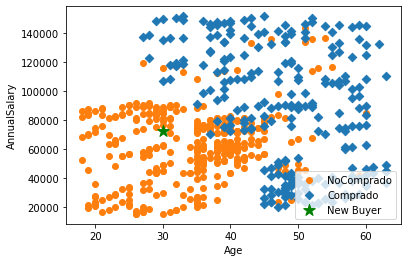

In [ ]:
fig, ax = plt.subplots()

#Agrupación de NoComprado
subset = trainData.loc[trainData['Purchased']== 0]
print(subset)
ax.scatter(subset.Age, subset.AnnualSalary, marker='o', label='NoComprado', color='C1')

#Agrupación de Comprado
subset = trainData.loc[trainData['Purchased']==1]
print(subset)
print()
ax.scatter(subset.Age, subset.AnnualSalary, marker='D', label='Comprado', color='C0')

# Observación a predecir
ax.scatter(newBuyer.Age, newBuyer.AnnualSalary, marker='*', label='New Buyer', color='green', s=150)

plt.xlabel('Age')
plt.ylabel('AnnualSalary')

handles, labels = ax.get_legend_handles_labels()


ax.legend(handles, labels, loc=4)

#### Como se puede observar la estrella verde, un comprador (buyer) que tiene edad de 30años y su ingreso anual de 72000$, tiene vecinos cercanos que no compran. "NoComprado"

In [ ]:
scaler = preprocessing.StandardScaler()
scaler.fit(trainData[['Age', 'AnnualSalary']])  # Note the use of an array of column names

# Transform the full dataset
carNorm = pd.concat([pd.DataFrame(scaler.transform(car_df[['Age', 'AnnualSalary']]),
                                    columns=['zAge', 'zAnnualSalary']),
                       car_df[['Purchased']]], axis=1)
print(carNorm.head())
print(carNorm.shape)

trainNorm = carNorm.iloc[trainData.index]
validNorm = carNorm.iloc[validData.index]
print('Ejemplo de entrenamiento:')
print(trainNorm.iloc[:13, :])


newBuyerNorm = pd.DataFrame(scaler.transform(newBuyer), columns=['zAge', 'zAnnualSalary'])
print('\nNueva obs:')
print(newBuyer)
print('Nueva obs escalada:')
print(newBuyerNorm)

       zAge  zAnnualSalary  Purchased
0 -0.440970      -1.519365          0
1  0.028147      -0.843484          0
2  0.872557       0.033722          0
3  0.028147       0.997211          1
4 -1.379203       0.177526          0
(1000, 3)
Ejemplo de entrenamiento:
         zAge  zAnnualSalary  Purchased
473  1.716967      -0.742821          1
891  0.684910      -1.231756          1
587 -2.035966       0.263809          0
61   0.778734      -1.332419          1
877  0.121970      -0.412071          0
878 -0.440970      -0.742821          0
82   0.215794       0.450755          1
548 -0.347146      -0.613397          0
434  0.121970      -0.181984          0
395 -1.566850      -1.289278          0
933 -0.534793      -0.584637          0
601  1.247850      -0.023800          1
115 -0.159500       1.126635          0

Nueva obs:
   Age  AnnualSalary
0   30       72000.0
Nueva obs escalada:
       zAge  zAnnualSalary
0 -0.910086        -0.0238


In [ ]:
car_df.shape

(1000, 5)

In [ ]:
train_X = trainNorm[['zAge', 'zAnnualSalary']]
train_y = trainNorm['Purchased']
valid_X = validNorm[['zAge', 'zAnnualSalary']]
valid_y = validNorm['Purchased']

# 600 iteraciones para calcular el valor más preciso de k
results = []
for k in range(1, 601):
    knn = KNeighborsClassifier(n_neighbors=k).fit(train_X, train_y)
    results.append({
        'k': k,
        'accuracy': accuracy_score(valid_y, knn.predict(valid_X))
    })

#Resultados de k con su respectivo accuracy
results = pd.DataFrame(results)

# Cálculo de k con más accuracy
k_max = results['accuracy'].idxmax() + 1
print("Máximo accuracy: ", results['accuracy'].max(), 'cuyo k = ', k_max)

Máximo accuracy:  0.915 cuyo k =  6


## Como se puede visualizar, el número de vecinos que arroja una mayor precisión de predicción es k=6

# Conclusiones

1. Se concluye que La clasificación: K vecinos más cercanos - KNN, permite predecir la si una observación es parte de una clase utilizando el número preciso de vecinos más cercanos  

1. Se concluye Naïve Bayes es una técnica que permite clasificar una observación mediante diferentes algoritmos como Gaussian o Multinomial que se acoplan al tipo de las variables independientes

# Bibliografía

1. sklearn.naive_bayes.MultinomialNB. (2022). Scikit-Learn. https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html
1. Roy, B. (2021, January 8). MultinomialNB or GaussianNB or CategoricalNB what to use here? Stack Overflow. https://stackoverflow.com/questions/65627712/multinomialnb-or-gaussiannb-or-categoricalnb-what-to-use-here

‌
